# Machine Learning Project on Adult Income Prediction

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('/content/adult (1).data')
data.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [ ]:
column_names = ['age','workclass' ,'fnlwgt' ,'education' ,'educational-num' , 'marital-status' ,'occupation' ,'relationship' , 'race' ,'gender' ,'capital-gain' , 'capital-loss' , 'hours-per-week' ,'native-country'  ,'income' ]
data.columns = column_names
data.head(10)

age          workclass  fnlwgt      education  educational-num  \
0   50   Self-emp-not-inc   83311      Bachelors               13   
1   38            Private  215646        HS-grad                9   
2   53            Private  234721           11th                7   
3   28            Private  338409      Bachelors               13   
4   37            Private  284582        Masters               14   
5   49            Private  160187            9th                5   
6   52   Self-emp-not-inc  209642        HS-grad                9   
7   31            Private   45781        Masters               14   
8   42            Private  159449      Bachelors               13   
9   37            Private  280464   Some-college               10   

           marital-status          occupation    relationship    race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-spouse   Handlers-cleaners         Husband   Black   
3      Married-civ-spouse      Prof-specialty            Wife   Black   
4      Married-civ-spouse     Exec-managerial            Wife   White   
5   Married-spouse-absent       Other-service   Not-in-family   Black   
6      Married-civ-spouse     Exec-managerial         Husband   White   
7           Never-married      Prof-specialty   Not-in-family   White   
8      Married-civ-spouse     Exec-managerial         Husband   White   
9      Married-civ-spouse     Exec-managerial         Husband   Black   

    gender  capital-gain  capital-loss  hours-per-week  native-country  income  
0     Male             0             0              13   United-States   <=50K  
1     Male             0             0              40   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3   Female             0             0              40            Cuba   <=50K  
4   Female             0             0              40   United-States   <=50K  
5   Female             0             0              16         Jamaica   <=50K  
6     Male             0             0              45   United-States    >50K  
7   Female         14084             0              50   United-States    >50K  
8     Male          5178             0              40   United-States    >50K  
9     Male             0             0              80   United-States    >50K

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   fnlwgt           32560 non-null  int64 
 3   education        32560 non-null  object
 4   educational-num  32560 non-null  int64 
 5   marital-status   32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   gender           32560 non-null  object
 10  capital-gain     32560 non-null  int64 
 11  capital-loss     32560 non-null  int64 
 12  hours-per-week   32560 non-null  int64 
 13  native-country   32560 non-null  object
 14  income           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.shape

(32560, 15)

In [ ]:
data.describe()

age        fnlwgt  educational-num  capital-gain  \
count  32560.000000  3.256000e+04     32560.000000  32560.000000   
mean      38.581634  1.897818e+05        10.080590   1077.615172   
std       13.640642  1.055498e+05         2.572709   7385.402999   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178315e+05         9.000000      0.000000   
50%       37.000000  1.783630e+05        10.000000      0.000000   
75%       48.000000  2.370545e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  32560.000000    32560.000000  
mean      87.306511       40.437469  
std      402.966116       12.347618  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [ ]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


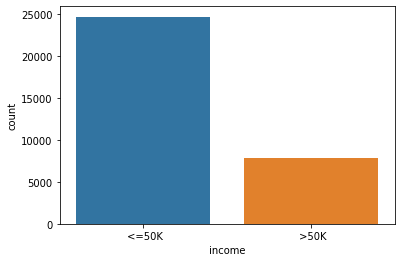

In [ ]:
sns.countplot(data.income)

## Data Cleaning

In [ ]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
data= data.drop(['fnlwgt'],axis=1)

In [ ]:
data.head()

age          workclass   education  educational-num       marital-status  \
0   50   Self-emp-not-inc   Bachelors               13   Married-civ-spouse   
1   38            Private     HS-grad                9             Divorced   
2   53            Private        11th                7   Married-civ-spouse   
3   28            Private   Bachelors               13   Married-civ-spouse   
4   37            Private     Masters               14   Married-civ-spouse   

           occupation    relationship    race   gender  capital-gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              13   United-States   <=50K  
1             0              40   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40            Cuba   <=50K  
4             0              40   United-States   <=50K

## Data Visualization and EDA

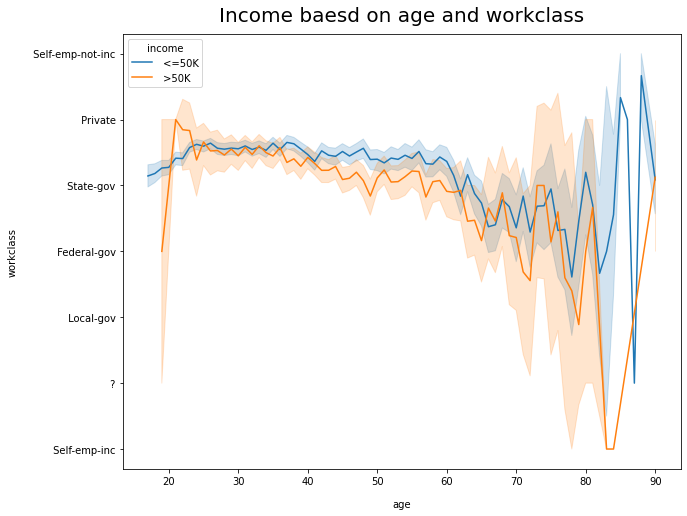

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='workclass', hue='income', data=data)
plt.title("Income baesd on age and workclass", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("workclass", labelpad=13)
ax = plt.gca()

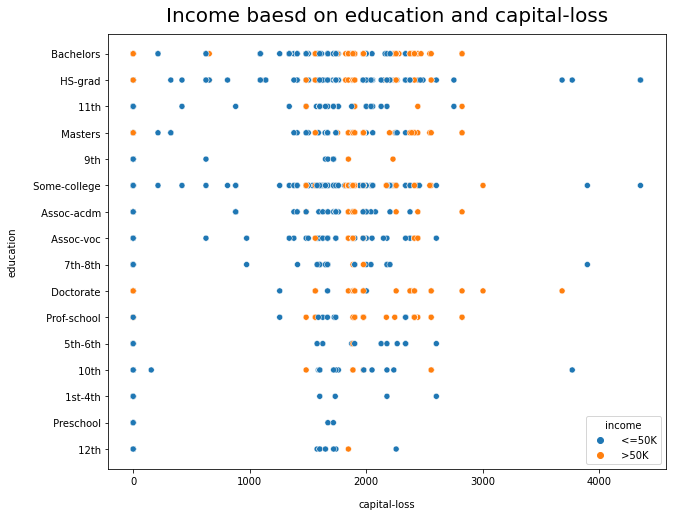

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='capital-loss', y='education', hue='income', data=data)
plt.title("Income baesd on education and capital-loss", y=1.015, fontsize=20)
plt.xlabel("capital-loss", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

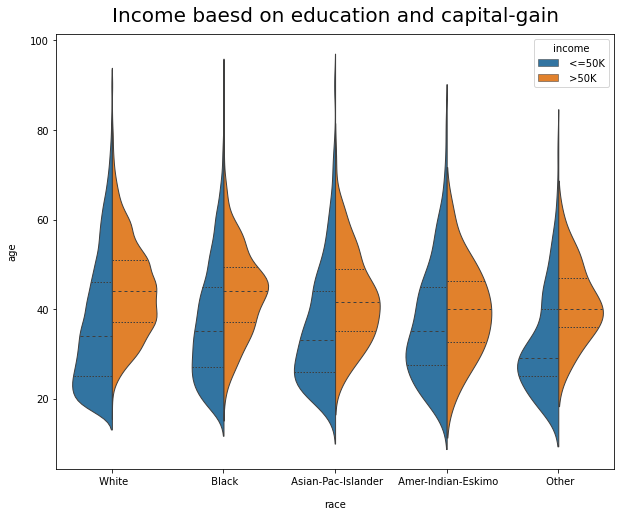

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x="race", y="age", hue="income",
               split=True, inner="quart", linewidth=1,
               )
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("race", labelpad=13)
plt.ylabel("age", labelpad=13)
ax = plt.gca()

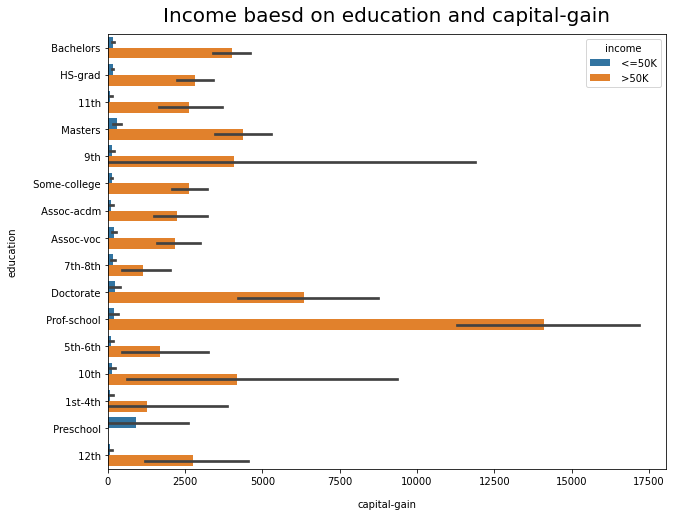

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='capital-gain', y='education', hue='income', data=data)
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("capital-gain", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

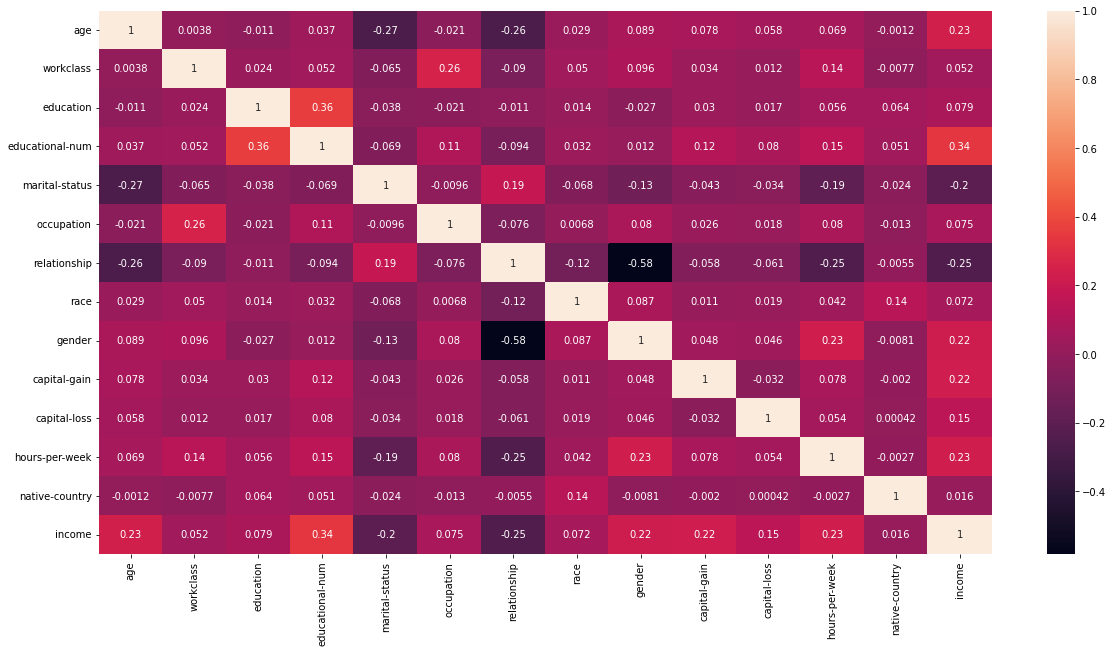

In [ ]:
data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()
plt.close()

## Data Encoding

In [ ]:
data.head()

age          workclass   education  educational-num       marital-status  \
0   50   Self-emp-not-inc   Bachelors               13   Married-civ-spouse   
1   38            Private     HS-grad                9             Divorced   
2   53            Private        11th                7   Married-civ-spouse   
3   28            Private   Bachelors               13   Married-civ-spouse   
4   37            Private     Masters               14   Married-civ-spouse   

           occupation    relationship    race   gender  capital-gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              13   United-States   <=50K  
1             0              40   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40            Cuba   <=50K  
4             0              40   United-States   <=50K

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   education        32560 non-null  object
 3   educational-num  32560 non-null  int64 
 4   marital-status   32560 non-null  object
 5   occupation       32560 non-null  object
 6   relationship     32560 non-null  object
 7   race             32560 non-null  object
 8   gender           32560 non-null  object
 9   capital-gain     32560 non-null  int64 
 10  capital-loss     32560 non-null  int64 
 11  hours-per-week   32560 non-null  int64 
 12  native-country   32560 non-null  object
 13  income           32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32560 non-null  int64
 1   workclass        32560 non-null  int64
 2   education        32560 non-null  int64
 3   educational-num  32560 non-null  int64
 4   marital-status   32560 non-null  int64
 5   occupation       32560 non-null  int64
 6   relationship     32560 non-null  int64
 7   race             32560 non-null  int64
 8   gender           32560 non-null  int64
 9   capital-gain     32560 non-null  int64
 10  capital-loss     32560 non-null  int64
 11  hours-per-week   32560 non-null  int64
 12  native-country   32560 non-null  int64
 13  income           32560 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [ ]:
data.head()

age  workclass  education  educational-num  marital-status  occupation  \
0   50          6          9               13               2           4   
1   38          4         11                9               0           6   
2   53          4          1                7               2           6   
3   28          4          9               13               2          10   
4   37          4         12               14               2           4   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0             0     4       1             0             0              13   
1             1     4       1             0             0              40   
2             0     2       1             0             0              40   
3             5     2       0             0             0              40   
4             5     4       0             0             0              40   

   native-country  income  
0              39       0  
1              39       0  
2              39       0  
3               5       0  
4              39       0

In [ ]:
features = data.drop(['income'],axis=1)
target = data['income']
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=89,test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22792, 13) (9768, 13) (22792,) (9768,)


## Data Modeling and Training

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
logistic_model = LogisticRegression(multi_class='multinomial', max_iter = 100)
logistic_model.fit(x_train, y_train)

train_predictions_logistic = logistic_model.predict(x_train)
test_predictions_logistic = logistic_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
SVC_Model=SVC()
SVC_Model.fit(x_train,y_train)
SVC_Model.score(x_test,y_test)
train_predictions_SVM=SVC_Model.predict(x_train)
test_predictions_SVM=SVC_Model.predict(x_test)

In [ ]:
KNN_Model=KNeighborsClassifier(n_neighbors=13)
KNN_Model.fit(x_train,y_train)
train_predictions_KNN=KNN_Model.predict(x_train)
test_predictions_KNN=KNN_Model.predict(x_test)

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(x_train, y_train)

train_pred_DecisionTree = dt_model.predict(x_train)
test_pred_DecisionTree = dt_model.predict(x_test)

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(x_train, y_train)
train_pred_RandomForest = clf.predict(x_train)
test_pred_RandomForest = clf.predict(x_test)

## Model Evaluation

In [ ]:
print(f'Accuracy score for training LogisticRegression: {accuracy_score(y_train, train_predictions_logistic)*100:.2f}%')
print(f'Accuracy score for testing LogisticRegression: {accuracy_score(y_test, test_predictions_logistic)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training SVM: {accuracy_score(y_train, train_predictions_SVM)*100:.2f}%')
print(f'Accuracy score for testing SVM: {accuracy_score(y_test, test_predictions_SVM)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training KNN: {accuracy_score(y_train, train_predictions_KNN)*100:.2f}%')
print(f'Accuracy score for testing KNN: {accuracy_score(y_test, test_predictions_KNN)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training DecisionTree {accuracy_score(y_train, train_pred_DecisionTree)*100:.2f}%')
print(f'Accuracy score for testing DecisionTree {accuracy_score(y_test, test_pred_DecisionTree)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training RandomForest {accuracy_score(y_train, train_pred_RandomForest)*100:.2f}%')
print(f'Accuracy score for testing RandomForest {accuracy_score(y_test, test_pred_RandomForest)*100:.2f}%')

Accuracy score for training LogisticRegression: 80.68%
Accuracy score for testing LogisticRegression: 79.51%
----------------------------------------------------------------------------------------------------
Accuracy score for training SVM: 80.53%
Accuracy score for testing SVM: 79.55%
----------------------------------------------------------------------------------------------------
Accuracy score for training KNN: 86.89%
Accuracy score for testing KNN: 83.42%
----------------------------------------------------------------------------------------------------
Accuracy score for training DecisionTree 84.70%
Accuracy score for testing DecisionTree 83.83%
----------------------------------------------------------------------------------------------------
Accuracy score for training RandomForest 85.27%
Accuracy score for testing RandomForest 84.51%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

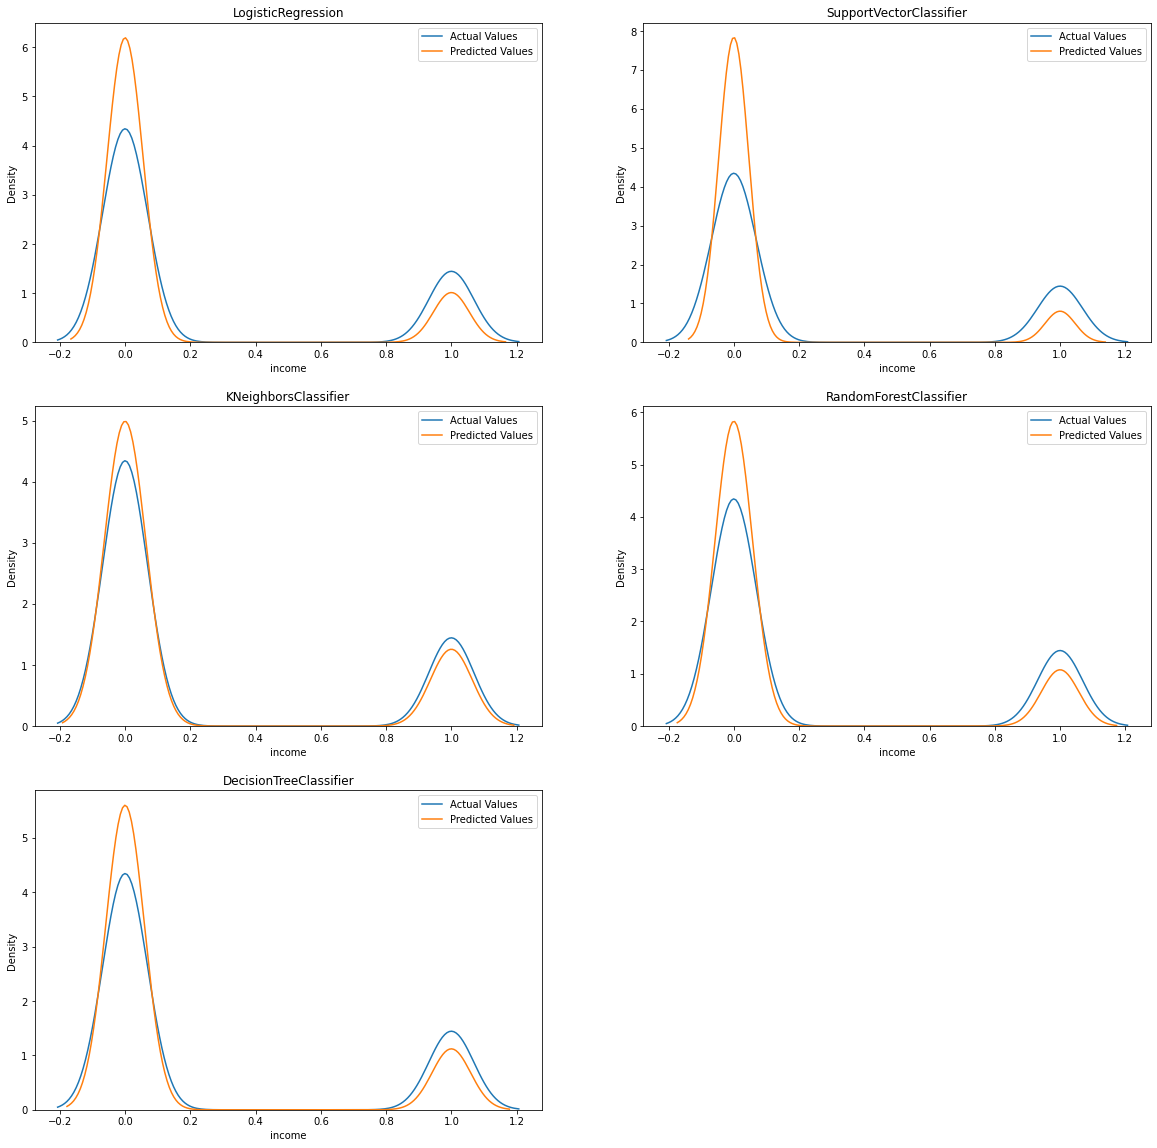

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_predictions_logistic,hist=False,label='Predicted Values')
ax.set_title('LogisticRegression')
plt.legend()
plt.subplot(3, 2, 2)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_predictions_SVM,hist=False,label='Predicted Values')
ax.set_title('SupportVectorClassifier')
plt.legend()
plt.subplot(3, 2, 3)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_predictions_KNN,hist=False,label='Predicted Values')
ax.set_title('KNeighborsClassifier')
plt.legend()
plt.subplot(3, 2, 4)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_pred_RandomForest,hist=False,label='Predicted Values')
ax.set_title('RandomForestClassifier')
plt.legend()
plt.subplot(3, 2, 5)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_pred_DecisionTree,hist=False,label='Predicted Values')
ax.set_title('DecisionTreeClassifier')
plt.legend()